In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data_stations = pd.read_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_stations.csv', delimiter=",")

In [44]:
data_stations['Data_Hora'] = pd.to_datetime(data_stations['Data_Hora'])

In [45]:
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983033 entries, 0 to 4983032
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Data_Hora       datetime64[ns]
 1   Latitude        float64       
 2   Longitude       float64       
 3   Precipitacao    float64       
 4   Radiacao_Solar  float64       
 5   Temperatura     float64       
 6   Umidade         float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 266.1 MB


In [41]:
def bar_plot_media_mensal_por_ano(df, variavel, cor):

    df['Year'] = df['Data_Hora'].dt.year
    df['Month'] = df['Data_Hora'].dt.strftime('%b')

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    grouped_df = df.groupby([df['Year'], df['Month']])[variavel].mean().reset_index(name='Mean')

    grouped_df['Month'] = pd.Categorical(grouped_df['Month'], categories=month_order, ordered=True)
    grouped_df = grouped_df.sort_values(['Year', 'Month'])

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for i, year in enumerate(grouped_df['Year'].unique()):
        yearly_data = grouped_df[grouped_df['Year'] == year]
        axes[i].bar(yearly_data['Month'], yearly_data['Mean'], color=cor)
        axes[i].set_title(f'Ano: {year}')
        axes[i].set_xlabel('Mês')
        axes[i].set_xticks(range(len(month_order)))
        axes[i].set_xticklabels(month_order, rotation=0)

    fig.supylabel(f'Média de {variavel}')

    plt.tight_layout()

    plt.show()


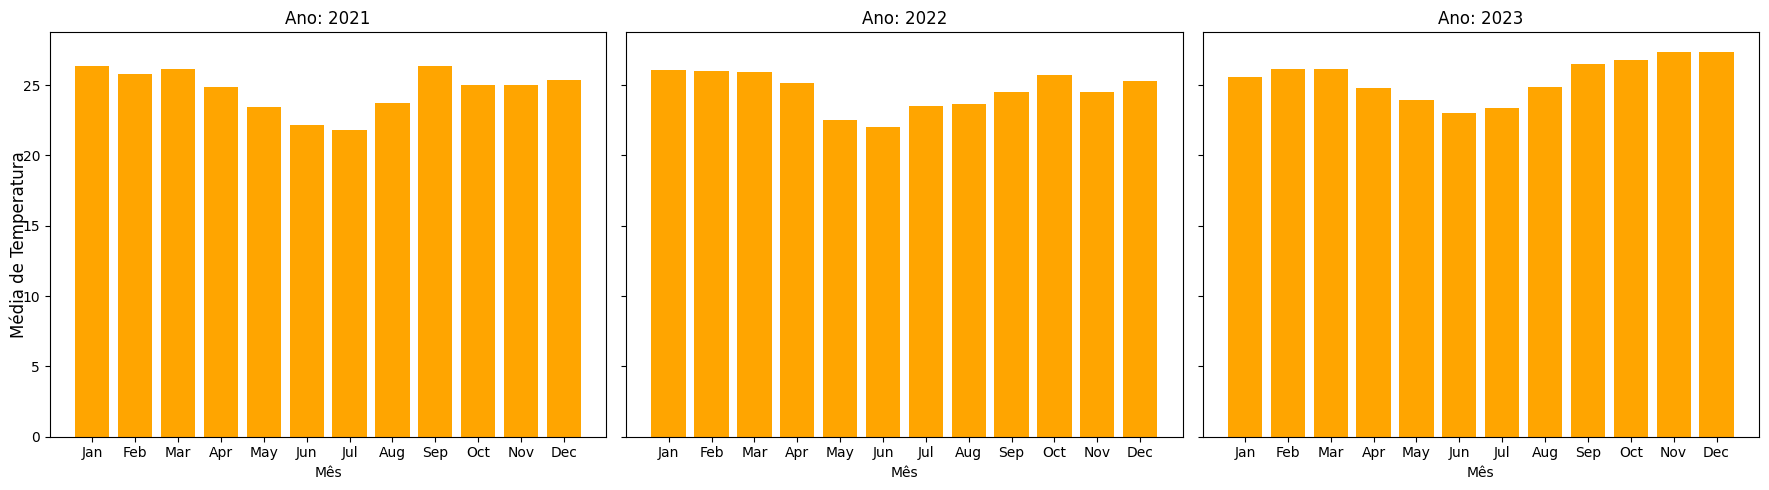

In [34]:
bar_plot_media_mensal_por_ano(data_stations, 'Temperatura', 'orange')

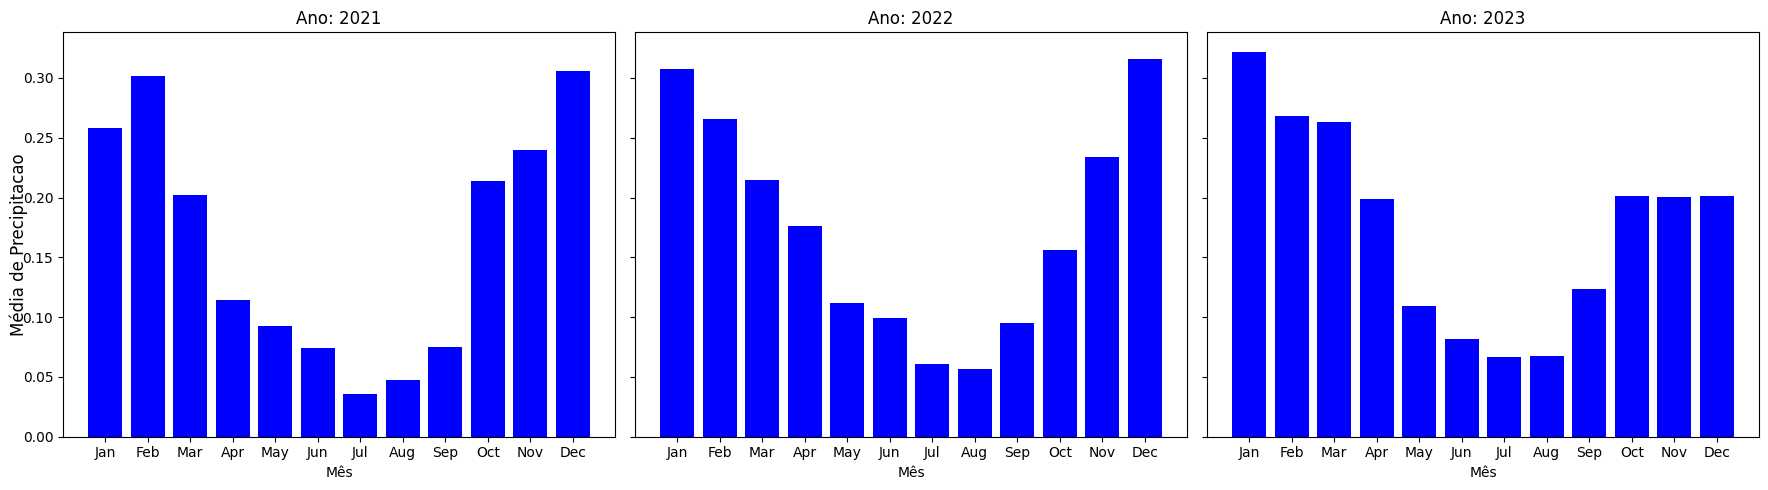

In [35]:
bar_plot_media_mensal_por_ano(data_stations, 'Precipitacao', 'blue')

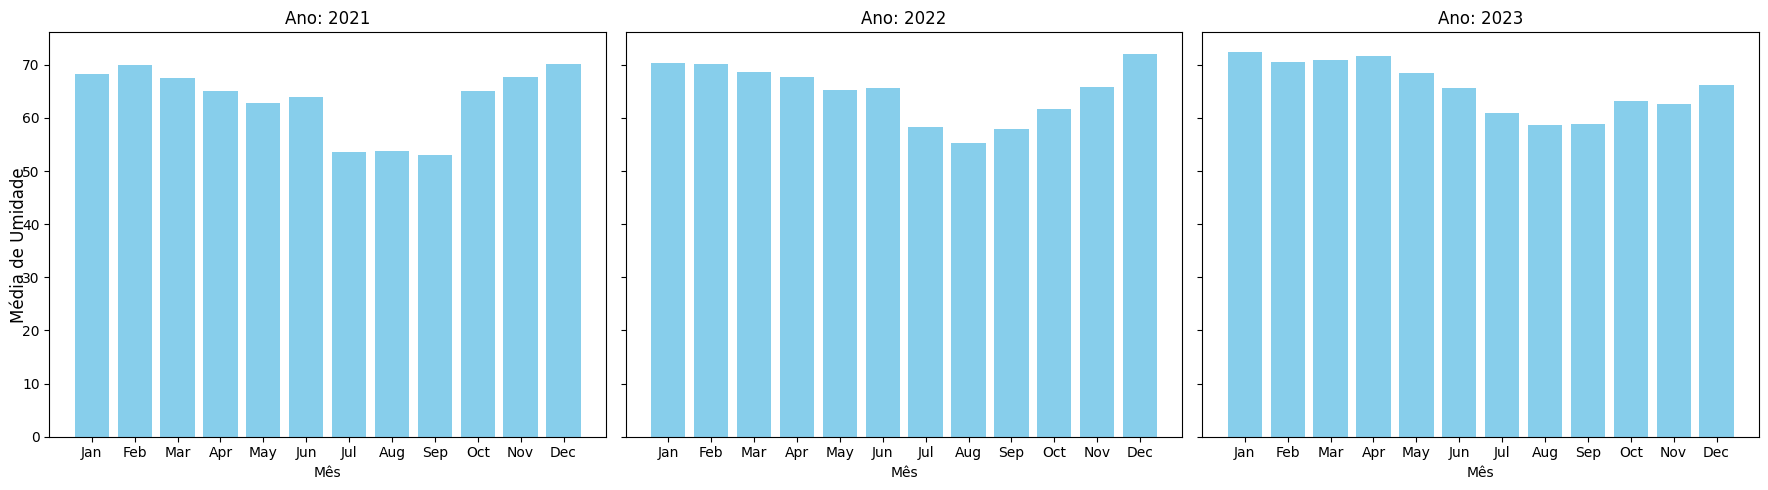

In [46]:
bar_plot_media_mensal_por_ano(data_stations, 'Umidade', 'skyblue')

In [18]:
data_burned = pd.read_csv(r'C:\Users\math_\OneDrive\DaFi-Project\no-git-Impact-of-Burned-on-Brazilian-Agribusiness-Stocks\df_data_burned.csv', delimiter=",")

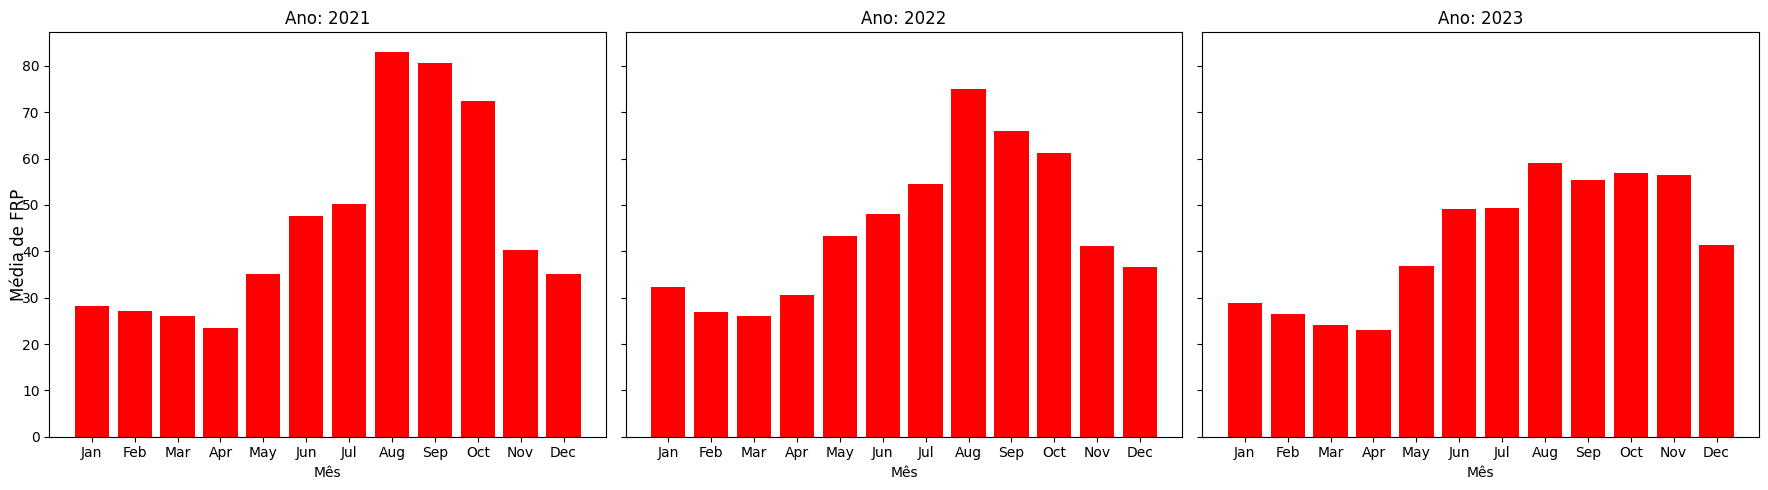

In [42]:
bar_plot_media_mensal_por_ano(data_burned, 'FRP', 'red')

In [19]:
data_burned['Data_Hora'] = pd.to_datetime(data_burned['Data_Hora'])

In [20]:
data_burned

,Data_Hora,Latitude,Longitude,DiaSemChuva,Precipitacao,RiscoFogo,FRP
0,2021-12-05 16:54:00,-3.05079,-49.48395,0.0,7.3,0.00,14.4
1,2021-12-05 16:49:00,-24.85887,-48.50217,8.0,8.7,0.20,9.0
2,2021-12-05 16:54:00,-1.39502,-52.67188,1.0,11.0,0.00,30.7
3,2021-12-05 16:54:00,-3.07819,-40.74868,1.0,0.3,0.70,46.8
4,2021-12-05 16:54:00,-3.06516,-52.92874,1.0,1.5,0.00,9.3
...,...,...,...,...,...,...,...
574740,2023-07-27 18:02:00,-6.93483,-59.52313,12.0,0.0,0.46,82.0
574741,2023-07-27 18:02:00,-6.93405,-59.56060,12.0,0.0,0.45,160.6
574742,2023-07-27 18:02:00,-6.93259,-59.55067,12.0,0.0,0.46,40.4
574743,2023-07-27 18:02:00,-6.93112,-59.54064,12.0,0.0,0.46,751.6


In [21]:
data_burned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574745 entries, 0 to 574744
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Data_Hora     574745 non-null  datetime64[ns]
 1   Latitude      574745 non-null  float64       
 2   Longitude     574745 non-null  float64       
 3   DiaSemChuva   566025 non-null  float64       
 4   Precipitacao  566025 non-null  float64       
 5   RiscoFogo     566025 non-null  float64       
 6   FRP           574745 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 30.7 MB
